In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.impute import SimpleImputer



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


## Introduction
Content: 

1.[Load and Check Data](#1)

2.[Preparing Data](#2)
     
   * [Rename to Economy](#3)
   * [Rename Happiness Score to Score](#4)
   * [Rename Happiness Rank to Rank](#5)
   * [Remove Region and Change name to Country](#6)
   * [Change name for health](#7)
   * [Change name for Freedom](#8)
   * [Change name for Trust (Government Corruption)](#9)

<a id = "1"></a><br>
# Load and Check Data

In [2]:
df_2019 = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
df_2018 = pd.read_csv("/kaggle/input/world-happiness/2018.csv")
df_2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")
df_2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
df_2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")

In [3]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df_2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [6]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
print(df_2019.columns, df_2018.columns, df_2017.columns, df_2016.columns, df_2015.columns, sep ="\n")

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', '

<a id = "2"></a><br>
# Preparing Data

<a id = "3"></a><br>
## Rename to economy for every csv

In [9]:
df_2015.rename(columns={"Economy (GDP per Capita)" : "Economy"}, inplace=True)
df_2016.rename(columns={"Economy (GDP per Capita)" : "Economy"}, inplace=True)
df_2017.rename(columns={"Economy..GDP.per.Capita." : "Economy"}, inplace=True)
df_2018.rename(columns={"GDP per capita" : "Economy"}, inplace=True)
df_2019.rename(columns={"GDP per capita" : "Economy"}, inplace=True)

<a id = "4"></a><br>
## Rename Happiness Score to Score

In [10]:
df_2015.rename(columns={"Happiness Score" : "Score"}, inplace=True)
df_2016.rename(columns={"Happiness Score" : "Score"}, inplace=True)
df_2017.rename(columns={"Happiness.Score" : "Score"}, inplace=True)

<a id = "5"></a><br>
## Rename Happiness Rank to Rank

In [11]:
df_2015.rename(columns={"Happiness Rank" : "Rank"}, inplace=True)
df_2016.rename(columns={"Happiness Rank" : "Rank"}, inplace=True)
df_2017.rename(columns={"Happiness.Rank" : "Rank"}, inplace=True)
df_2018.rename(columns={"Overall rank" : "Rank"}, inplace=True)
df_2019.rename(columns={"Overall rank" : "Rank"}, inplace=True)

<a id = "6"></a><br>
## Remove Region and Change name to Country

In [12]:
df_2015.drop(columns=["Region"], inplace=True)
df_2016.drop(columns=["Region"], inplace=True)
df_2018.rename(columns={"Country or region" : "Country"}, inplace=True)
df_2019.rename(columns={"Country or region" : "Country"}, inplace=True)

<a id = "7"></a><br>
## Change name for health

In [13]:
df_2015.rename(columns={"Health (Life Expectancy)" : "Health"}, inplace=True)
df_2016.rename(columns={"Health (Life Expectancy)" : "Health"}, inplace=True)
df_2017.rename(columns={"Health..Life.Expectancy." : "Health"}, inplace=True)
df_2018.rename(columns={"Healthy life expectancy" : "Health"}, inplace=True)
df_2019.rename(columns={"Healthy life expectancy" : "Health"}, inplace=True)

<a id = "8"></a><br>
## Change name for Freedom

In [14]:
df_2018.rename(columns={"Freedom to make life choices" : "Freedom"}, inplace=True)
df_2019.rename(columns={"Freedom to make life choices" : "Freedom"}, inplace=True)

<a id = "9"></a><br>
## Change name for Trust (Government Corruption)

In [15]:
df_2015.rename(columns={"Trust (Government Corruption)" : "Trust"}, inplace=True)
df_2016.rename(columns={"Trust (Government Corruption)" : "Trust"}, inplace=True)
df_2017.rename(columns={"Trust..Government.Corruption." : "Trust"}, inplace=True)
df_2018.rename(columns={"Perceptions of corruption" : "Trust"}, inplace=True)
df_2019.rename(columns={"Perceptions of corruption" : "Trust"}, inplace=True)

In [16]:
df_2015['Year'] =2015
df_2016['Year'] =2016
df_2017['Year'] =2017
df_2018['Year'] =2018
df_2019['Year'] =2019

In [17]:
df_2015.drop(columns=["Standard Error"], inplace=True)

In [18]:
df_2015.drop(columns=["Family","Dystopia Residual"], inplace=True)

In [19]:
df_2016.drop(columns=["Lower Confidence Interval","Upper Confidence Interval","Family","Dystopia Residual"],inplace=True)

In [20]:
df_2017.drop(columns=["Whisker.high","Whisker.low","Family","Dystopia.Residual"], inplace=True)

In [21]:
df_2018.drop(columns=["Social support"], inplace=True)

In [22]:
df_2019.drop(columns=["Social support"], inplace=True)

In [23]:
print(df_2019.columns, df_2018.columns, df_2017.columns, df_2016.columns, df_2015.columns, sep ="\n")

Index(['Rank', 'Country', 'Score', 'Economy', 'Health', 'Freedom',
       'Generosity', 'Trust', 'Year'],
      dtype='object')
Index(['Rank', 'Country', 'Score', 'Economy', 'Health', 'Freedom',
       'Generosity', 'Trust', 'Year'],
      dtype='object')
Index(['Country', 'Rank', 'Score', 'Economy', 'Health', 'Freedom',
       'Generosity', 'Trust', 'Year'],
      dtype='object')
Index(['Country', 'Rank', 'Score', 'Economy', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Year'],
      dtype='object')
Index(['Country', 'Rank', 'Score', 'Economy', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Year'],
      dtype='object')


In [24]:
df_happiness = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019],axis=0)

In [25]:
df_happiness

,Country,Rank,Score,Economy,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,2019


In [26]:
df_happiness.describe()

,Rank,Score,Economy,Health,Freedom,Trust,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,0.612416,0.411091,0.125436,0.218576,2016.993606
std,45.182384,1.127456,0.407340,0.248309,0.152880,0.105816,0.122321,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.440183,0.309767,0.054000,0.130000,2016.000000
50%,79.000000,5.322000,0.982205,0.647310,0.431000,0.091000,0.201982,2017.000000
75%,118.000000,6.189500,1.236187,0.808000,0.531000,0.156030,0.278832,2018.000000
max,158.000000,7.769000,2.096000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [27]:
print('Country unique')
countries=df_happiness.Country.unique()
for country in countries:
    print(country)

Country unique
Switzerland
Iceland
Denmark
Norway
Canada
Finland
Netherlands
Sweden
New Zealand
Australia
Israel
Costa Rica
Austria
Mexico
United States
Brazil
Luxembourg
Ireland
Belgium
United Arab Emirates
United Kingdom
Oman
Venezuela
Singapore
Panama
Germany
Chile
Qatar
France
Argentina
Czech Republic
Uruguay
Colombia
Thailand
Saudi Arabia
Spain
Malta
Taiwan
Kuwait
Suriname
Trinidad and Tobago
El Salvador
Guatemala
Uzbekistan
Slovakia
Japan
South Korea
Ecuador
Bahrain
Italy
Bolivia
Moldova
Paraguay
Kazakhstan
Slovenia
Lithuania
Nicaragua
Peru
Belarus
Poland
Malaysia
Croatia
Libya
Russia
Jamaica
North Cyprus
Cyprus
Algeria
Kosovo
Turkmenistan
Mauritius
Hong Kong
Estonia
Indonesia
Vietnam
Turkey
Kyrgyzstan
Nigeria
Bhutan
Azerbaijan
Pakistan
Jordan
Montenegro
China
Zambia
Romania
Serbia
Portugal
Latvia
Philippines
Somaliland region
Morocco
Macedonia
Mozambique
Albania
Bosnia and Herzegovina
Lesotho
Dominican Republic
Laos
Mongolia
Swaziland
Greece
Lebanon
Hungary
Honduras
Tajikistan
T

In [28]:
print("Country Counts :\n")
print(df_happiness['Country'].value_counts())

Country Counts :

Tanzania                    5
Gabon                       5
Zambia                      5
Chile                       5
Cameroon                    5
                           ..
Somaliland region           1
Gambia                      1
Taiwan Province of China    1
North Macedonia             1
Oman                        1
Name: Country, Length: 170, dtype: int64


In [29]:
pd.isnull(df_happiness).sum()

Country       0
Rank          0
Score         0
Economy       0
Health        0
Freedom       0
Trust         1
Generosity    0
Year          0
dtype: int64

In [30]:
df_happiness.dropna(how='any',axis='rows')

,Country,Rank,Score,Economy,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,2019


In [31]:
Sum=df_happiness.isnull().sum()
Percentage = (df_happiness.isnull().sum()/df_happiness.isnull().count())
pd.concat([Sum,Percentage], axis=1,keys=['Sum','Percentage'])

,Sum,Percentage
Country,0,0.000000
Rank,0,0.000000
Score,0,0.000000
Economy,0,0.000000
Health,0,0.000000
Freedom,0,0.000000
Trust,1,0.001279
Generosity,0,0.000000
Year,0,0.000000


In [32]:
df_eksik =df_happiness[df_happiness['Trust'].isna()]
df_eksik

,Country,Rank,Score,Economy,Health,Freedom,Trust,Generosity,Year
19,United Arab Emirates,20,6.774,2.096,0.67,0.284,NaN,0.186,2018


In [33]:
Sum=df_happiness.isnull().sum()
Percentage = (df_happiness.isnull().sum()/df_happiness.isnull().count())
pd.concat([Sum,Percentage], axis=1,keys=['Sum','Percentage'])

,Sum,Percentage
Country,0,0.000000
Rank,0,0.000000
Score,0,0.000000
Economy,0,0.000000
Health,0,0.000000
Freedom,0,0.000000
Trust,1,0.001279
Generosity,0,0.000000
Year,0,0.000000


In [34]:
pd.isnull(df_happiness).sum()

Country       0
Rank          0
Score         0
Economy       0
Health        0
Freedom       0
Trust         1
Generosity    0
Year          0
dtype: int64

In [35]:
df_happiness.drop([19],axis=0,inplace=True)

In [36]:
pd.isnull(df_happiness).sum()

Country       0
Rank          0
Score         0
Economy       0
Health        0
Freedom       0
Trust         0
Generosity    0
Year          0
dtype: int64

In [37]:
import matplotlib.pyplot as plt 

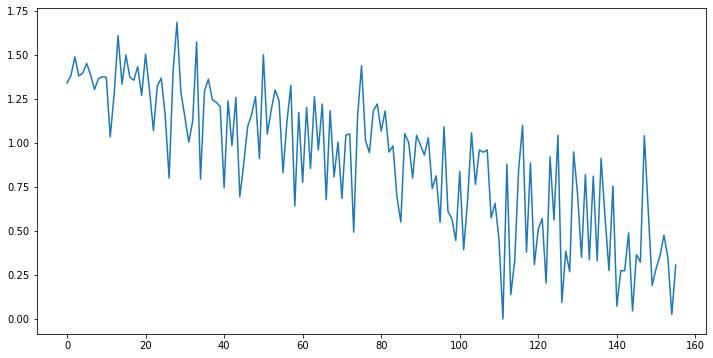

In [38]:
plt.figure(figsize=(12,6))

plt.plot(df_2019.Economy)  

plt.show()

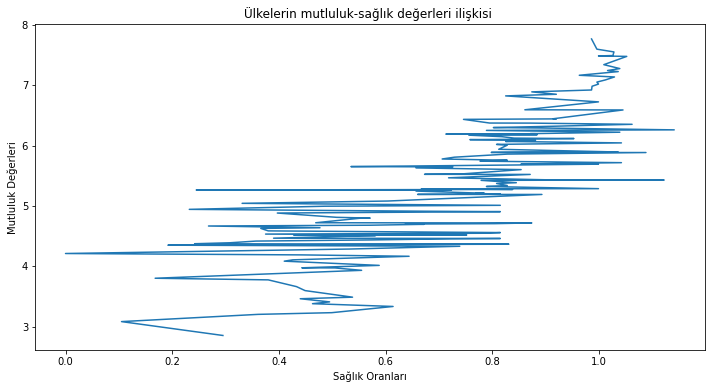

In [39]:
plt.figure(figsize=(12,6))

plt.plot(df_2019.Health, df_2019.Score) 

plt.title("Ülkelerin mutluluk-sağlık değerleri ilişkisi ")

plt.xlabel("Sağlık Oranları")

plt.ylabel("Mutluluk Değerleri")
plt.show()

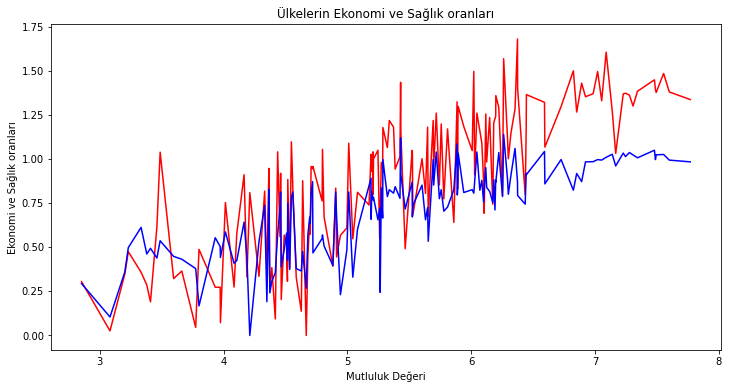

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df_2019.Score,df_2019.Economy,color="red") 
plt.plot(df_2019.Score,df_2019.Health,color="blue")
plt.xlabel("Mutluluk Değeri")
plt.ylabel("Ekonomi ve Sağlık oranları")
plt.title("Ülkelerin Ekonomi ve Sağlık oranları")
plt.show()

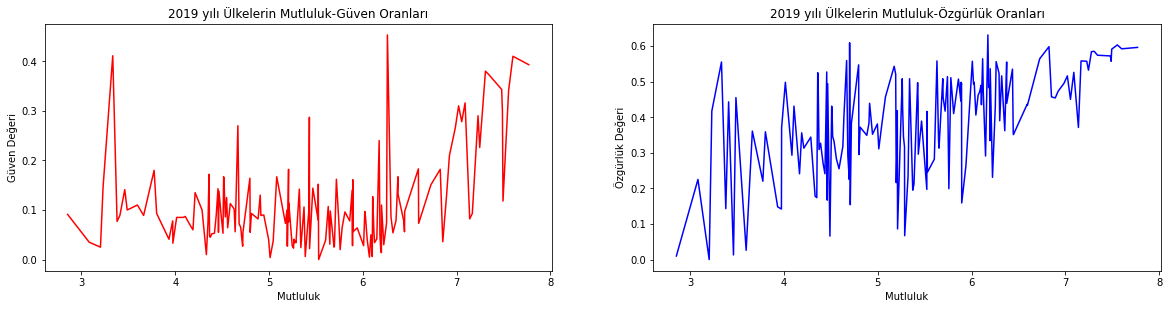

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)   
plt.plot(df_2019.Score,df_2019.Trust,color="r") 
plt.xlabel("Mutluluk")
plt.ylabel("Güven Değeri")
plt.title("2019 yılı Ülkelerin Mutluluk-Güven Oranları")

plt.subplot(2,2,2)
plt.plot(df_2019.Score,df_2019.Freedom,color="blue")
plt.xlabel("Mutluluk")
plt.ylabel("Özgürlük Değeri")
plt.title("2019 yılı Ülkelerin Mutluluk-Özgürlük Oranları")
plt.show()

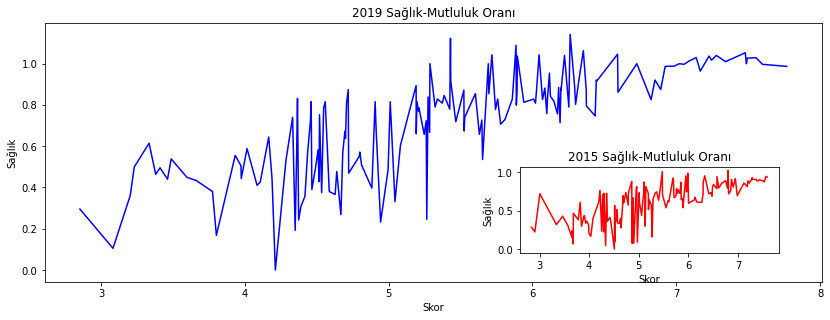

In [42]:
f=plt.figure(figsize=(12,4)) 
axes1=f.add_axes([0.1,0.1,0.9,0.9]) 
axes2=f.add_axes([0.65,0.2,0.3,0.3])

axes1.plot(df_2019.Score,df_2019.Health,color="blue")
axes2.plot(df_2015.Score,df_2015.Health,color="red")
axes1.set_xlabel("Skor")
axes2.set_xlabel("Skor")
axes1.set_ylabel("Sağlık")
axes2.set_ylabel("Sağlık")
axes1.set_title("2019 Sağlık-Mutluluk Oranı")
axes2.set_title("2015 Sağlık-Mutluluk Oranı")

plt.show()

<AxesSubplot:xlabel='Score', ylabel='Country'>

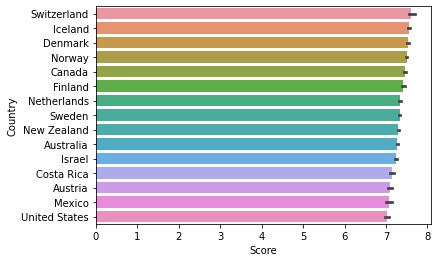

In [43]:
sns.barplot(y= df_happiness['Country'][:15], x= df_happiness['Score'])

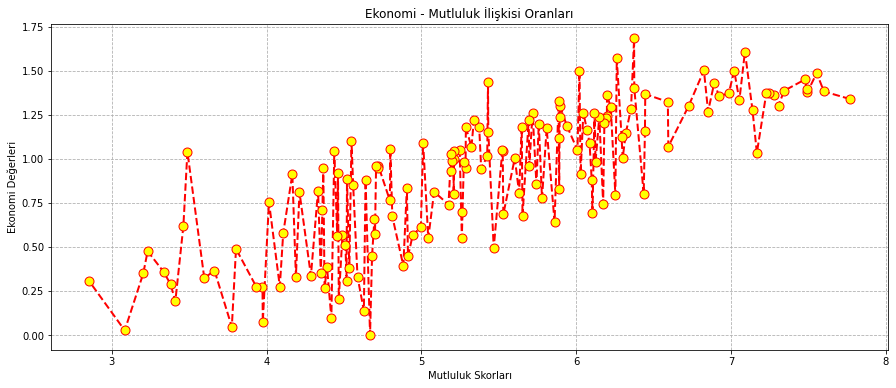

In [44]:
plt.figure(figsize=(15,6))
plt.plot(df_2019.Score,df_2019.Economy,color="r",linewidth=2,linestyle="--",
        marker="o",markersize=9,markerfacecolor="yellow",markeredgewidth=1) 
plt.xlabel("Mutluluk Skorları")
plt.ylabel("Ekonomi Değerleri")
plt.title("Ekonomi - Mutluluk İlişkisi Oranları")
plt.grid(linestyle="--")
plt.show()

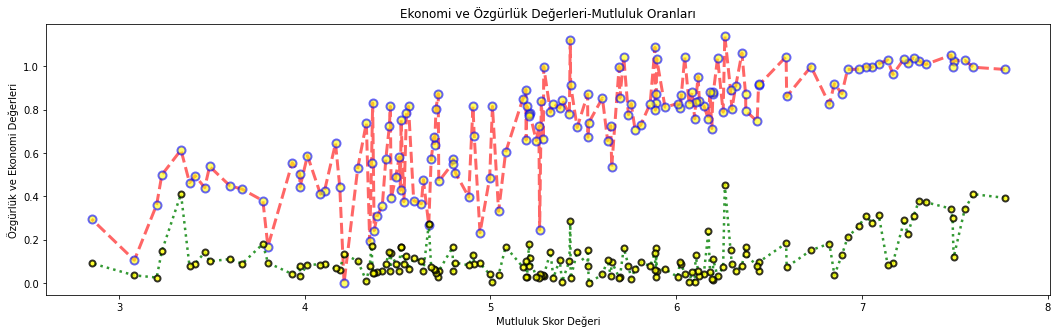

In [45]:
plt.figure(figsize=(18,5))
plt.plot(df_2019.Score,df_2019.Health,color="r",linewidth=3,linestyle="--",marker="o",markersize=8,
markerfacecolor="yellow",markeredgewidth=2,markeredgecolor="blue",alpha=0.6) 
plt.plot(df_2019.Score,df_2019.Trust,color="green",linewidth=2.5,linestyle=":",marker="o",markerfacecolor="yellow",
markeredgewidth=2,markeredgecolor="black",alpha=0.8)
plt.xlabel("Mutluluk Skor Değeri")
plt.ylabel("Özgürlük ve Ekonomi Değerleri")
plt.title("Ekonomi ve Özgürlük Değerleri-Mutluluk Oranları")
plt.show()

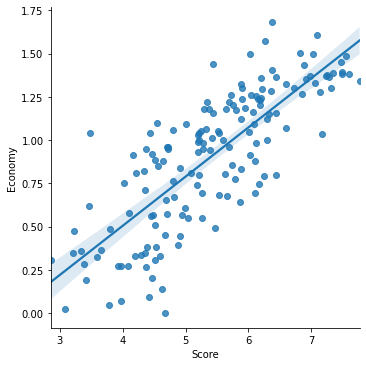

In [46]:
sns.lmplot(x='Score', y='Economy', data=df_2019)

## Health vs Happiness Score from 2015- 2019

<AxesSubplot:>

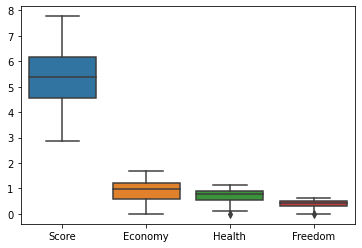

In [47]:
df_copy = df_2019.drop(["Rank", "Trust","Generosity","Year"], axis=1)
sns.boxplot(data=df_copy)

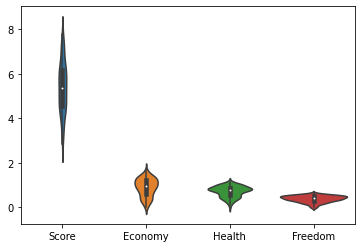

In [48]:
sns.violinplot(data=df_copy)
plt.show()

<AxesSubplot:>

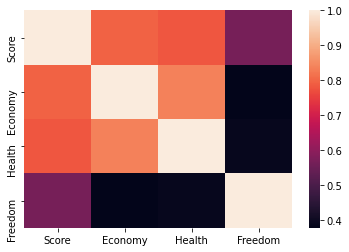

In [49]:
corr = df_copy.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Health vs Happiness Score from 2015- 2019')

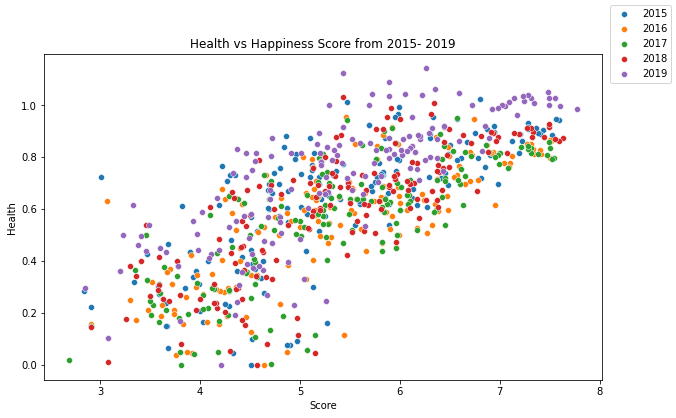

In [50]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= df_2015['Score'],y=df_2015['Health'])
sns.scatterplot(x= df_2016['Score'],y=df_2016['Health'])
sns.scatterplot(x= df_2017['Score'],y=df_2017['Health'])
sns.scatterplot(x= df_2018['Score'],y=df_2018['Health'])
sns.scatterplot(x= df_2019['Score'],y=df_2019['Health'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Health vs Happiness Score from 2015- 2019")

## Freedom vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Freedom vs Happiness Score from 2015- 2019')

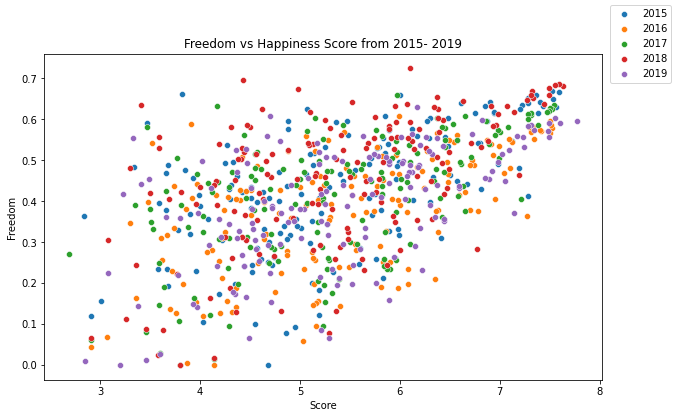

In [51]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= df_2015['Score'],y=df_2015['Freedom'])
sns.scatterplot(x= df_2016['Score'],y=df_2016['Freedom'])
sns.scatterplot(x= df_2017['Score'],y=df_2017['Freedom'])
sns.scatterplot(x= df_2018['Score'],y=df_2018['Freedom'])
sns.scatterplot(x= df_2019['Score'],y=df_2019['Freedom'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Freedom vs Happiness Score from 2015- 2019")

## Trust vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Trust vs Happiness Score from 2015- 2019')

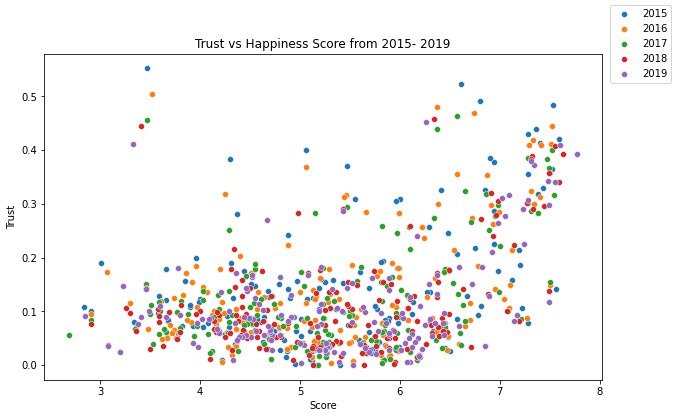

In [52]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= df_2015['Score'],y=df_2015['Trust'])
sns.scatterplot(x= df_2016['Score'],y=df_2016['Trust'])
sns.scatterplot(x= df_2017['Score'],y=df_2017['Trust'])
sns.scatterplot(x= df_2018['Score'],y=df_2018['Trust'])
sns.scatterplot(x= df_2019['Score'],y=df_2019['Trust'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Trust vs Happiness Score from 2015- 2019")

## Happiest Country vs. Saddest Country

In [53]:
print("In 2015, Happiest Country is "+ str(df_2015[:1]['Country'][0]))
print("In 2016, Happiest Country is "+ str(df_2016[:1]['Country'][0]))
print("In 2017, Happiest Country is "+ str(df_2017[:1]['Country'][0]))
print("In 2018, Happiest Country is "+ str(df_2018[:1]['Country'][0]))
print("In 2019, Happiest Country is "+ str(df_2019[:1]['Country'][0]))

In 2015, Happiest Country is Switzerland
In 2016, Happiest Country is Denmark
In 2017, Happiest Country is Norway
In 2018, Happiest Country is Finland
In 2019, Happiest Country is Finland


In [54]:
print("Saddest Country is "+ str(df_2015[-1:]['Country'][len(df_2015)-1]))
print("Saddest Country is "+ str(df_2016[-1:]['Country'][len(df_2016)-1]))
print("Saddest Country is "+ str(df_2017[-1:]['Country'][len(df_2017)-1]))
print("Saddest Country is "+ str(df_2018[-1:]['Country'][len(df_2018)-1]))
print("Saddest Country is "+ str(df_2019[-1:]['Country'][len(df_2019)-1]))

Saddest Country is Togo
Saddest Country is Burundi
Saddest Country is Central African Republic
Saddest Country is Burundi
Saddest Country is South Sudan


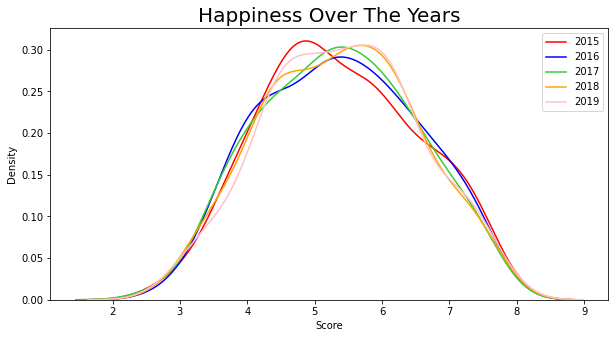

In [55]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2015['Score'],color='red', label='2015')
sns.kdeplot(df_2016['Score'],color='blue', label='2016')
sns.kdeplot(df_2017['Score'],color='limegreen', label='2017')
sns.kdeplot(df_2018['Score'],color='orange', label='2018')
sns.kdeplot(df_2019['Score'],color='pink', label='2019')
plt.title('Happiness Over The Years',size=20)
plt.legend()
plt.show()

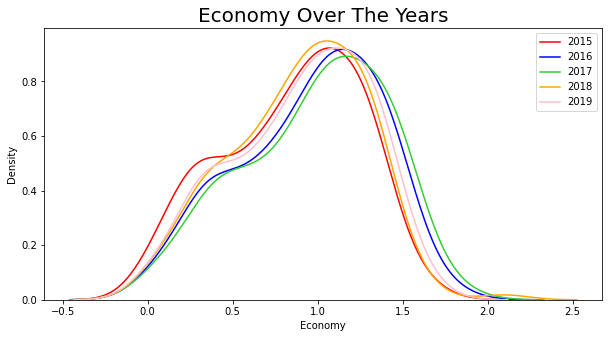

In [56]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2015['Economy'],color='red', label='2015')
sns.kdeplot(df_2016['Economy'],color='blue', label='2016')
sns.kdeplot(df_2017['Economy'],color='limegreen', label='2017')
sns.kdeplot(df_2018['Economy'],color='orange', label='2018')
sns.kdeplot(df_2019['Economy'],color='pink', label='2019')
plt.title('Economy Over The Years',size=20)
plt.legend()
plt.show()

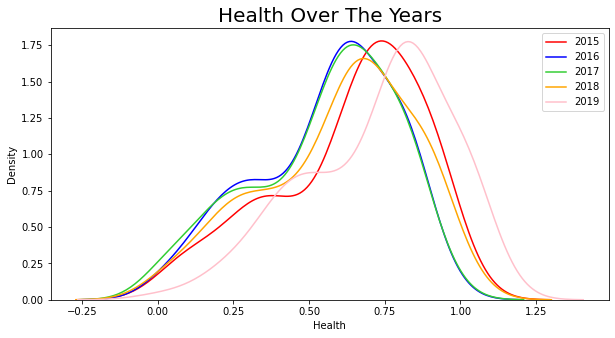

In [57]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2015['Health'],color='red', label='2015')
sns.kdeplot(df_2016['Health'],color='blue', label='2016')
sns.kdeplot(df_2017['Health'],color='limegreen', label='2017')
sns.kdeplot(df_2018['Health'],color='orange', label='2018')
sns.kdeplot(df_2019['Health'],color='pink', label='2019')
plt.title('Health Over The Years',size=20)
plt.legend()
plt.show()

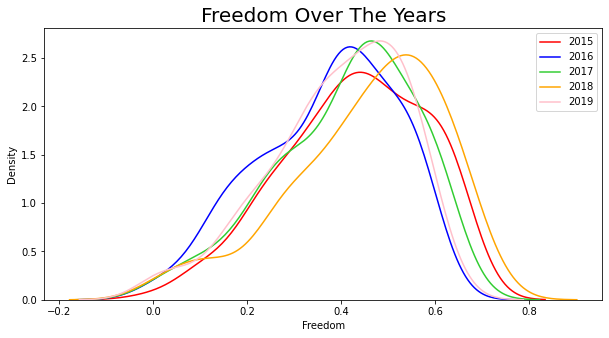

In [58]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2015['Freedom'],color='red', label='2015')
sns.kdeplot(df_2016['Freedom'],color='blue', label='2016')
sns.kdeplot(df_2017['Freedom'],color='limegreen', label='2017')
sns.kdeplot(df_2018['Freedom'],color='orange', label='2018')
sns.kdeplot(df_2019['Freedom'],color='pink', label='2019')
plt.title('Freedom Over The Years',size=20)
plt.legend()
plt.show()

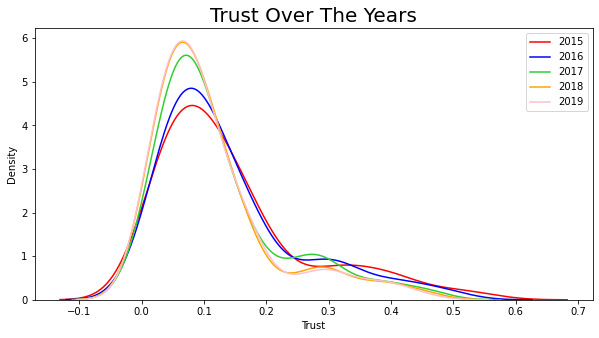

In [59]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2015['Trust'],color='red', label='2015')
sns.kdeplot(df_2016['Trust'],color='blue', label='2016')
sns.kdeplot(df_2017['Trust'],color='limegreen', label='2017')
sns.kdeplot(df_2018['Trust'],color='orange', label='2018')
sns.kdeplot(df_2019['Trust'],color='pink', label='2019')
plt.title('Trust Over The Years',size=20)
plt.legend()
plt.show()

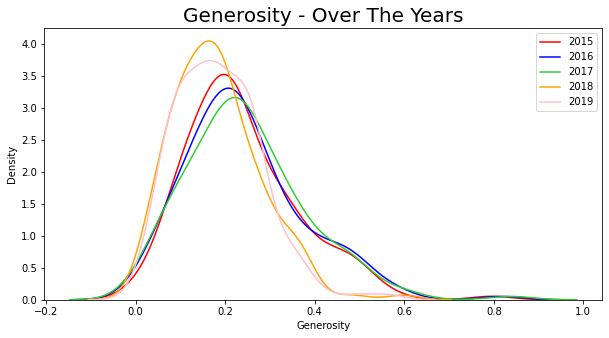

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2015['Generosity'],color='red', label='2015')
sns.kdeplot(df_2016['Generosity'],color='blue', label='2016')
sns.kdeplot(df_2017['Generosity'],color='limegreen', label='2017')
sns.kdeplot(df_2018['Generosity'],color='orange', label='2018')
sns.kdeplot(df_2019['Generosity'],color='pink', label='2019')
plt.title('Generosity - Over The Years',size=20)
plt.legend()
plt.show()